<h1> <center> ANALYZING RESPONSES FROM THE STACK OVERFLOW ANNUAL DEVELOPER SURVEY 2020

<H4> INSTALLING LIBRARIES

In [1]:
# Installing both "opendatasets" as well as "pandas"
!pip install opendatasets pandas --upgrade --quiet

<h4> IMPORTING LIBRARIES

In [2]:
import opendatasets as od

# os module provides functions for interacting with the operating system 
import os

import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Downloading the file
od.download('https://www.kaggle.com/datasets/aitzaz/stack-overflow-developer-survey-2020')

Skipping, found downloaded files in ".\stack-overflow-developer-survey-2020" (use force=True to force download)


In [4]:
# Checking the downloaded files
os.listdir('.\stack-overflow-developer-survey-2020')

['developer_survey_2020']

In [5]:
os.listdir('.\stack-overflow-developer-survey-2020\developer_survey_2020')

['README_2020.txt',
 'so_survey_2020.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [6]:
# Now lets read the data using `pandas` and also create a variable name for the dataframe 
survey_raw_df = pd.read_csv('stack-overflow-developer-survey-2020\developer_survey_2020\survey_results_public.csv')
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

**Note** - Here, shortcodes for survey questions have been used as column names

In [7]:
# Reading the schema file and giving a variable name for the dataframe 
schema = pd.read_csv('stack-overflow-developer-survey-2020\developer_survey_2020\survey_results_schema.csv')
schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column        61 non-null     object
 1   QuestionText  61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [8]:
# Changing the index to Column and converting from dataframe to series 
schema_raw = schema.set_index("Column").QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [9]:
# Accessing the Questions
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

___

<H4>DATA CLEANING

In [10]:
# Selecting columns needed for our analysis
selected_columns = [
    # Demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
    # Programming experience
    'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear',  'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt'
]

In [11]:
len(selected_columns)
# There are a total of 20 selected columns

20

In [12]:
# Creating a new df with selected_columns for both "Survey" and "Schema" dfs
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns] 

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

From the above series we can see that the total number of rows in each column should be 64461. But we see fewer numbers in many columns. Also, we see the datatype of some numeric columns to be object. This could be due to empty values as well as errors in the columns. Let’s fix this!  

In [14]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

# errors='coerce' converts non-numeric values to NaN

Let's check the descriptive stats of `survey_df`

In [15]:
survey_df.describe().round()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.0,57473.0,56784.0,44133.0,41151.0
mean,31.0,15.0,13.0,9.0,41.0
std,10.0,5.0,9.0,8.0,18.0
min,1.0,5.0,1.0,1.0,1.0
25%,24.0,12.0,6.0,3.0,40.0
50%,29.0,15.0,10.0,6.0,40.0
75%,35.0,18.0,17.0,12.0,44.0
max,279.0,85.0,50.0,50.0,475.0


From the above table we can see that the minimum age is 1 and maximum age is 279. This could be either an accidental or intentional error on the part of the participants. We’ll fix this issue by removing those rows where age is <10 and >85.

In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 85].index, inplace=True)

In [17]:
survey_df.describe().round()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45416.0,57451.0,56762.0,44119.0,41137.0
mean,31.0,15.0,13.0,9.0,41.0
std,9.0,5.0,9.0,8.0,18.0
min,10.0,5.0,1.0,1.0,1.0
25%,24.0,12.0,6.0,3.0,40.0
50%,29.0,15.0,10.0,6.0,40.0
75%,35.0,18.0,17.0,12.0,44.0
max,85.0,85.0,50.0,50.0,475.0


Similarly let's ignore `WorkWeekHrs` where the hours per week is >105 (i.e. >15 hours per day, 7 days a week)

In [18]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 105].index, inplace=True)

There are multiple options in gender column. We'll remove values containing more than one option to simplify our analysis.

In [19]:
survey_df['Gender'].value_counts()

Man                                                            45863
Woman                                                           3832
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

# Since there are nan values we use na=False in order to avoid errors
# np.nan

In [21]:
survey_df['Gender'].value_counts()

Man                                                  45863
Woman                                                 3832
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

In [22]:
# Data after cleaning 
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


<h3> DATA ANALYSIS

**1. Top 15 countries with highest responses for the survey**

In [23]:
schema.Country

'Where do you live?'

In [24]:
# Total number of countries from the survey df
survey_df.Country.nunique()

183

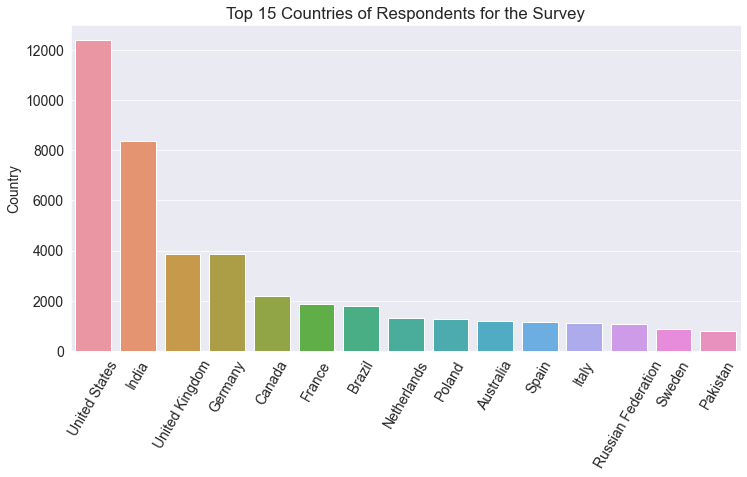

In [25]:
# Identifying the top 10 countries 
top_countries = survey_df.Country.value_counts().head(15)

# Visualizing the result
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("Top 15 Countries of Respondents for the Survey")
sns.barplot(x=top_countries.index, y=top_countries);

**INSIGHTS** - From the above graph it appears that most of the respondents are from the `US and India`. Perhaps this is because US and India are two  of the most populous nations that speak English as the survey conducted was in the English language. Not to mention that India is the 2nd most populous country in the world.

___

**2. Age distribution among respondents**

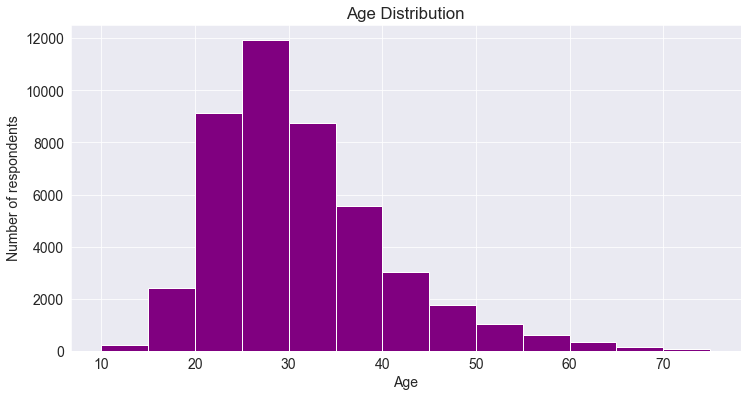

In [26]:
plt.figure(figsize=(12, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

**INSIGHTS** - From the above graph we can see that the age group of `25-30` is the highest among respondents. In general we can say that most of the respondents are of the age group of `20-40`. 

It’s interesting to note that the graph goes down after 30 which indicates that most of the programmers are young. 


___

**3. Gender distribution among respondents**

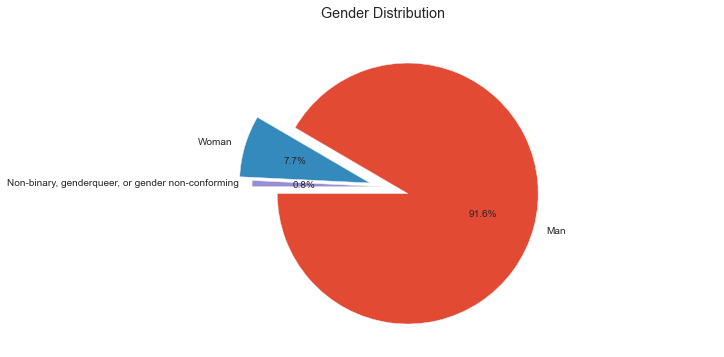

In [44]:
gender_counts = survey_df.Gender.value_counts()

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')

explode = (0.2, 0.1, 0)
plt.style.use('ggplot')
plt.axis('equal')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, explode=explode);


**INSIGHTS** - From the above chart we see that around 8% of respondents are not men. This shows that the programming industry is dominated by men and there is a lack of gender diversity. The overall programmers who are woman in the global community is expected to be somewhere around 20 - 30%.

___

**4. Education level of the respondents**

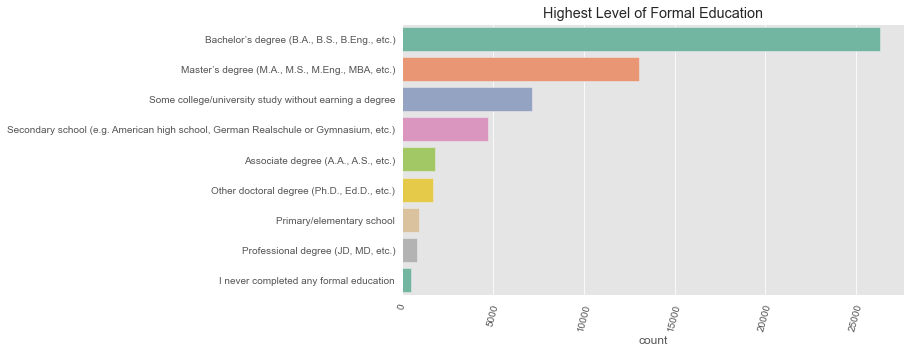

In [28]:
sns.countplot(y=survey_df.EdLevel,
              order=survey_df.EdLevel.value_counts().index, 
              palette='Set2')
plt.xticks(rotation=75);
plt.title('Highest Level of Formal Education')
plt.ylabel(None);

In [29]:
survey_df.EdLevel.value_counts().index

Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'],
      dtype='object')

**INSIGHTS** - From the above chart we can see that almost half of the respondents hold either a Bachelor's or Master's Degree. This shows that most of the programmers hold a college degree. 

___

**5. Primary field of study of the respondents**

In [30]:
schema.UndergradMajor

'What was your primary field of study?'

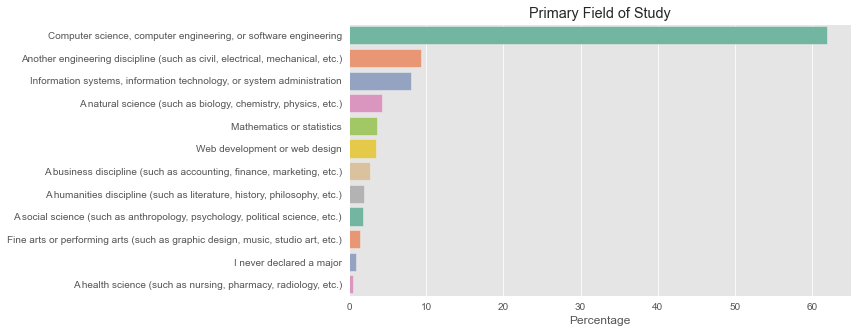

In [31]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index, 
            palette='Set2')

plt.title('Primary Field of Study')
plt.ylabel(None);
plt.xlabel('Percentage');

**INSIGHTS** - From the above graph we can see that around 60% of the respondents hold a degree in Computer Science or a similar degree. This means that around 40% of the programmers hold a degree other than Computer Science. 

___

**6. Employment status of the respondents**

In [32]:
schema.Employment

'Which of the following best describes your current employment status?'

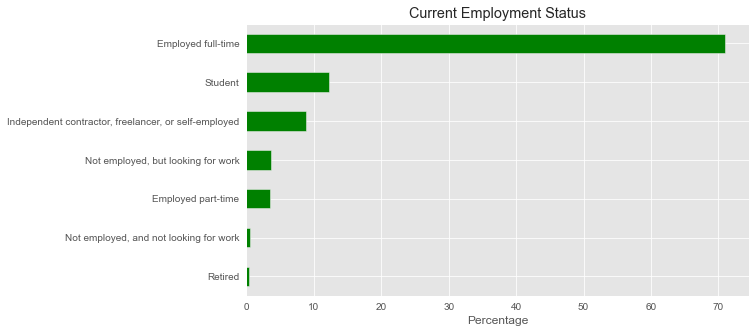

In [33]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('Current Employment Status')
plt.xlabel('Percentage');

**INSIGHTS** - From the above graph we can say that around 70% of the respondents are employed and around 10% of the respondents are either Freelancers or Part-time workers. 

___

**7. Developer types** 

In [34]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [35]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                   4394
Developer, back-end                                                                                                                                                                                                                                     3052
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                          2214
Developer, back-end;Developer, full-stack                                                                                                                                                                                                        

There are multiple options selected for Developer types. Let's seperate and create a df for each Developer type 

In [36]:
# Defining a function to split multiple DevType and put them in a seperate column of their own
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [37]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


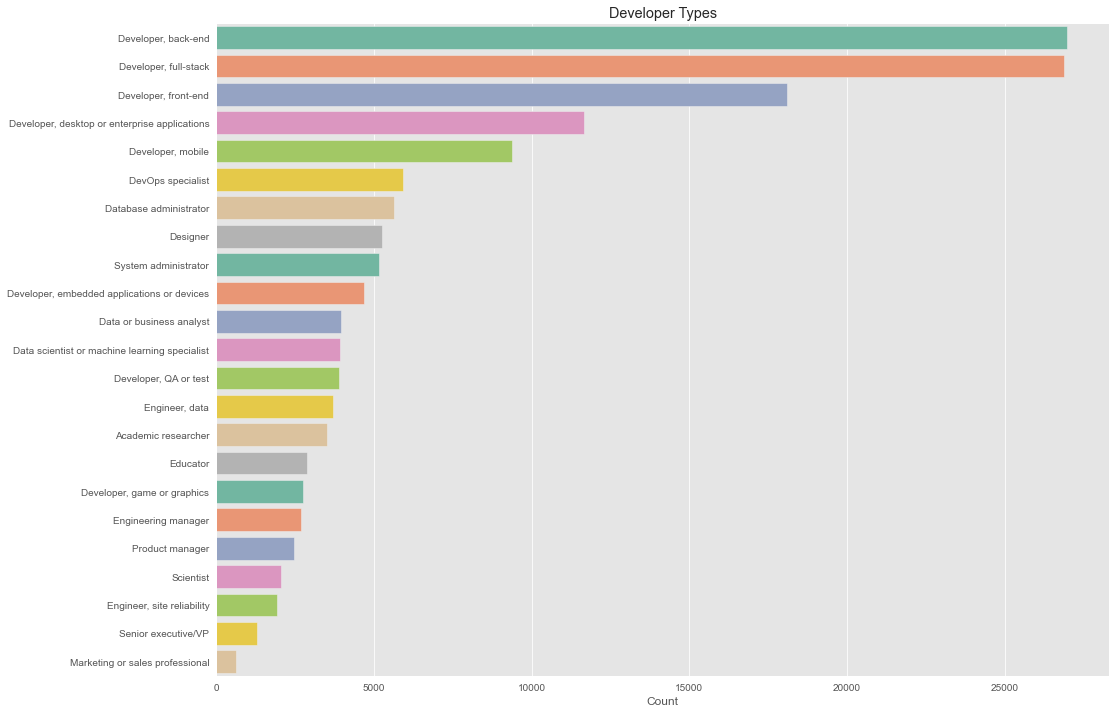

In [38]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

plt.figure(figsize=(16,12))

sns.barplot(x=dev_type_totals, y=dev_type_totals.index,
            palette='Set2')

plt.title('Developer Types')
plt.ylabel(None);
plt.xlabel('Count');

**INSIGHTS** - From the above chart it seems that around 4000 developers are Data Analysts. We can also see that around same number of developers are Data scientists. This goes on to show that programming is used in a diverse array of fields. 

___

**8. Most popular programming languages in 2020**

In [39]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64255, dtype: object

Just like in Dev Types there are multiple options selected here. Let's split them into seperate columns again

In [40]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let's aggregate the langauges to identify the percentage of respondents who selected each language.

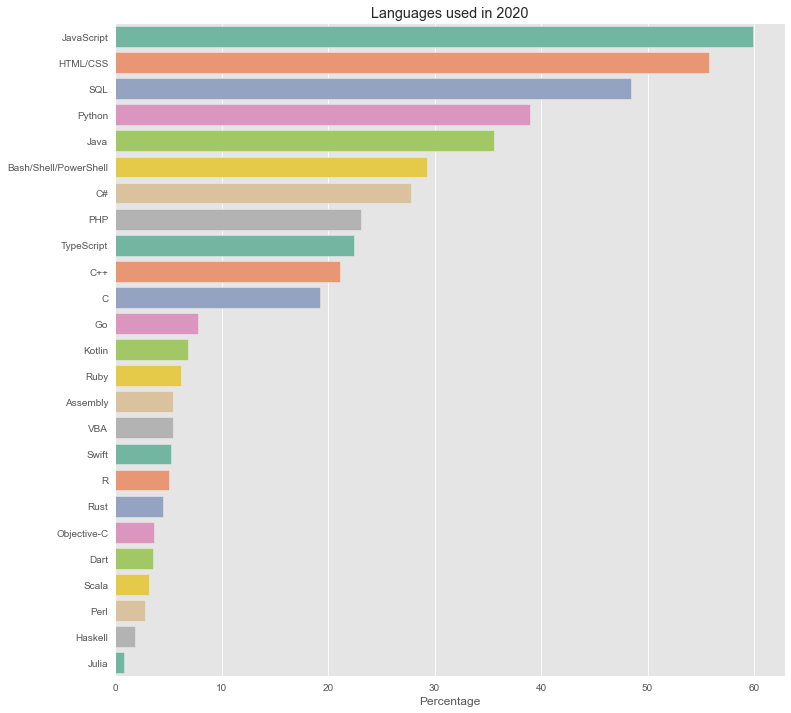

In [41]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index,
            palette='Set2')
plt.title('Languages used in 2020');
plt.xlabel('Percentage');


**INSIGHTS** - Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades

___

**9. Languages that most people are interested to learn over the next year (i.e. 2021)**

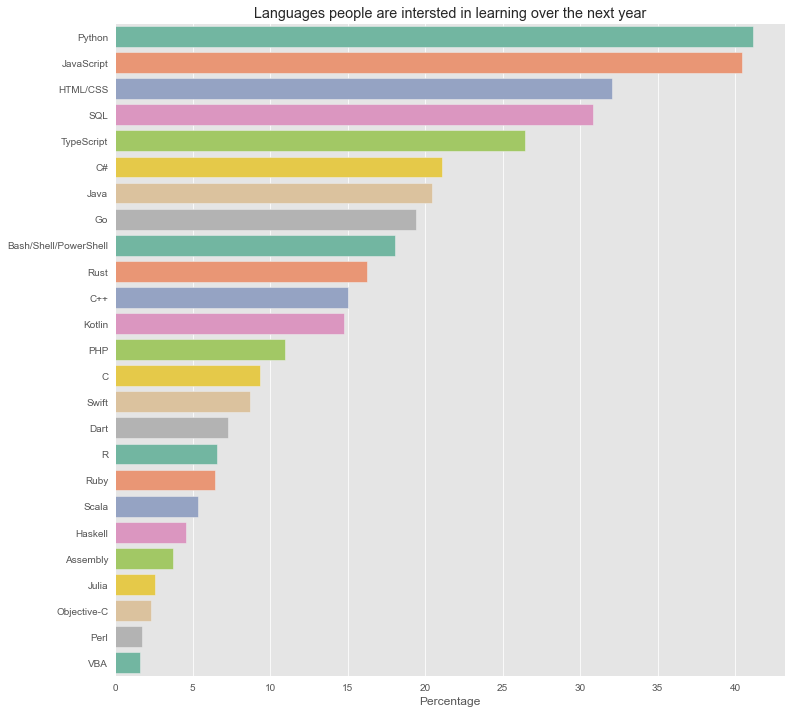

In [42]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index,
           palette='Set2')
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('Percentage');

**INSIGHTS** - It’s not surprising to see again, that Python is the language most people are interested in learning,  since it is an easy-to-learn general-purpose programming language well suited for a variety of domains

___

**10. Most loved languages**

High percentage of people who have used the language `and` want to continue learning and use it over the next year (i.e., 2021)

People who have used the language - `languages_loved_df`   
People who want to use the same language next year - `languages_worked_df` 

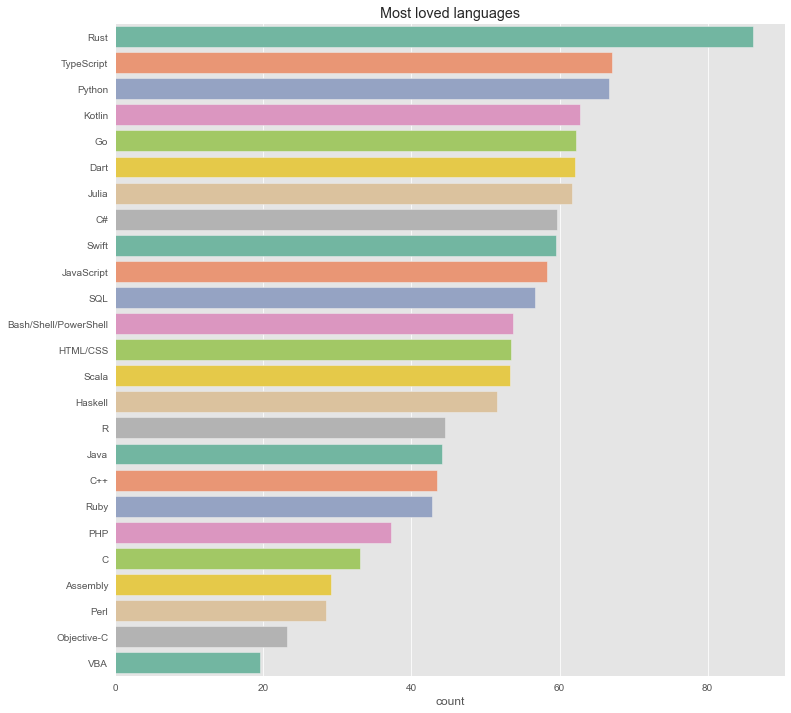

In [43]:
languages_loved_df = languages_worked_df & languages_interested_df

languages_loved_percentages = (languages_loved_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index,
            palette='Set2')
plt.title("Most loved languages");
plt.xlabel('count');

**INSIGHTS** - Rust has been StackOverflow's most-loved language for 4 years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.
Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.


___